In [1]:
import os as os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir("/Users/nastassia.patin/Desktop/Projects/BlueHole/ISMEJ_revisions/")
path = "60Ms_vs_deeps_KOs_readcounts.csv"

In [3]:
df = pd.read_csv(path)
df.head()

,Group,Subgroup,Subgroup2,KO,Function,ReadCounts,Sample,GE,ReadCounts_Norm,dataset
0,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis [PATH:ko00010],K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms
1,Metabolism,Carbohydrate metabolism,Galactose metabolism [PATH:ko00052],K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms
2,Metabolism,Carbohydrate metabolism,Starch and sucrose metabolism [PATH:ko00500],K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms
3,Metabolism,Carbohydrate metabolism,Amino sugar and nucleotide sugar metabolism [P...,K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms
4,Metabolism,Biosynthesis of other secondary metabolites,Streptomycin biosynthesis [PATH:ko00521],K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms


In [4]:
df = df.loc[(df['Group'] != 'Human Diseases') & 
               (df['Group'] != 'Brite Hierarchies') & 
               (df['Group'] != 'Organismal Systems') &
               (df['Subgroup'] != 'Cellular community - eukaryotes')]

In [5]:
df[['Subgroup2', 'PATH']] = df['Subgroup2'].str.split("[", n=1, expand=True)
df2 = df.drop('PATH', axis=1)
df2.head()

,Group,Subgroup,Subgroup2,KO,Function,ReadCounts,Sample,GE,ReadCounts_Norm,dataset
0,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms
1,Metabolism,Carbohydrate metabolism,Galactose metabolism,K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms
2,Metabolism,Carbohydrate metabolism,Starch and sucrose metabolism,K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms
3,Metabolism,Carbohydrate metabolism,Amino sugar and nucleotide sugar metabolism,K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms
4,Metabolism,Biosynthesis of other secondary metabolites,Streptomycin biosynthesis,K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms


### For KOs, drop duplicates

In [6]:
df3 = df2.sort_values('ReadCounts_Norm').drop_duplicates(subset=['Sample', 'KO'], keep='last')
df3 = df3.reset_index(drop=True)
df3.head()

,Group,Subgroup,Subgroup2,KO,Function,ReadCounts,Sample,GE,ReadCounts_Norm,dataset
0,Metabolism,Carbohydrate metabolism,Pyruvate metabolism,K01573,oadG; oxaloacetate decarboxylase (Na+ extrudi...,1,BH091995M,1283.9,0.000779,deeps
1,Metabolism,Amino acid metabolism,"Glycine, serine and threonine metabolism",K06720,ectC; L-ectoine synthase [EC:4.2.1.108],1,BH091995M,1283.9,0.000779,deeps
2,Not Included in Pathway or Brite,Poorly characterized,Function unknown,K09991,K09991; uncharacterized protein,2,BH091960M,2401.2,0.000833,60Ms
3,Environmental Information Processing,Signal transduction,Two-component system,K13588,chpT; histidine phosphotransferase ChpT,2,BH091960M,2401.2,0.000833,60Ms
4,Not Included in Pathway or Brite,Unclassified: genetic information processing,Protein processing,K19411,mcsA; protein arginine kinase activator,2,BH091960M,2401.2,0.000833,60Ms


### Split the data frame by dataset

In [7]:
df_G1 = df2.loc[(df2['dataset'] == '60Ms')]
df_G2 = df2.loc[(df2['dataset'] == 'deeps')]

In [11]:
df_G1_sub = df_G1[['KO','Sample','ReadCounts_Norm']]
df_G2_sub = df_G2[['KO','Sample','ReadCounts_Norm']]

### Concatenate the two data sets while maintaining the information as to which row is from which data set

In [12]:
concat = pd.concat([df_G1_sub.assign(dataset='60Ms'), df_G2_sub.assign(dataset='Deeps')])
concat.head()

,KO,Sample,ReadCounts_Norm,dataset
0,K00845,BH091960M,0.261952,60Ms
1,K00845,BH091960M,0.261952,60Ms
2,K00845,BH091960M,0.261952,60Ms
3,K00845,BH091960M,0.261952,60Ms
4,K00845,BH091960M,0.261952,60Ms


In [9]:
# now we can perform a lookup on a 'view' of the dataframe
sg2 = df2.loc[df2.Subgroup2=='Nitrogen metabolism ']
sg2 = sg2.reset_index(drop=True)
sg2.head()

,Group,Subgroup,Subgroup2,KO,Function,ReadCounts,Sample,GE,ReadCounts_Norm,dataset
0,Metabolism,Energy metabolism,Nitrogen metabolism,K01915,"glnA, GLUL; glutamine synthetase [EC:6.3.1.2]",5471,BH37,658.1,8.313326,60Ms
1,Metabolism,Energy metabolism,Nitrogen metabolism,K01915,"glnA, GLUL; glutamine synthetase [EC:6.3.1.2]",9429,BH091960M,2401.2,3.926787,60Ms
2,Metabolism,Energy metabolism,Nitrogen metabolism,K01455,E3.5.1.49; formamidase [EC:3.5.1.49],200,BH091960M,2401.2,0.083292,60Ms
3,Metabolism,Energy metabolism,Nitrogen metabolism,K10944,pmoA-amoA; methane/ammonia monooxygenase subu...,471,BH091960M,2401.2,0.196152,60Ms
4,Metabolism,Energy metabolism,Nitrogen metabolism,K10945,pmoB-amoB; methane/ammonia monooxygenase subu...,147,BH37,658.1,0.223370,60Ms


In [13]:
df3 = pd.pivot_table(data=concat, index='Sample', values='ReadCounts_Norm', columns='KO')
df3 = df3.fillna(0).reindex(["BH37","BH091960M","BH51","BH091995M"])
df3.head()

KO,K00003,K00005,K00009,K00010,K00012,K00013,K00014,K00015,K00016,K00018,...,K23492,K23508,K23514,K23518,K23535,K23536,K23537,K23548,K23549,K23573
Sample,,,,,,,,,,,,,,,,,,,,,
BH37,1.358456,0.000000,0.000000,0.308464,0.512080,0.743048,0.761282,0.057742,0.000000,0.217292,...,0.000000,0.000000,0.000000,0.000000,0.945145,0.791673,1.186750,0.000000,0.000000,0.000000
BH091960M,0.592620,0.000000,0.000000,0.084541,0.534733,0.415209,0.906630,0.034150,0.000000,0.285274,...,0.016242,0.000000,0.032067,0.052057,0.853323,1.465517,0.294436,0.000000,0.000000,0.018741
BH51,1.137606,0.000000,0.000000,0.072032,0.444610,1.043219,1.140089,0.094386,0.000000,0.057129,...,0.000000,0.000000,0.074516,0.074516,0.000000,0.000000,0.146547,0.000000,0.176354,1.266766
BH091995M,0.840408,0.053743,0.031155,0.031155,1.314744,0.498481,0.774204,0.056858,0.014799,0.071657,...,0.000000,0.022587,0.116832,0.038165,0.147987,0.153439,0.232884,0.102033,0.131630,2.562505


### Calculate the fold difference between sample pairs

In [14]:
def fold_difference(a, b, c, d):
    diff = ((a + b)/2) / ((c + d)/2)
    return(diff)

In [15]:
df4 = df3.replace(0, 0.000000001)
df4 = df4.append(pd.Series(name='Fold difference', dtype='float64'))
df4.loc['Fold difference'] = df4.apply(lambda x: 
                                           fold_difference(x.loc['BH37'], x.loc['BH091960M'], 
                                                           x.loc['BH51'], x.loc['BH091995M']), axis=0)
df4.head()

KO,K00003,K00005,K00009,K00010,K00012,K00013,K00014,K00015,K00016,K00018,...,K23492,K23508,K23514,K23518,K23535,K23536,K23537,K23548,K23549,K23573
Sample,,,,,,,,,,,,,,,,,,,,,
BH37,1.358456,1.000000e-09,1.000000e-09,0.308464,0.512080,0.743048,0.761282,0.057742,1.000000e-09,0.217292,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,9.451451e-01,7.916730e-01,1.186750,1.000000e-09,1.000000e-09,1.000000e-09
BH091960M,0.592620,1.000000e-09,1.000000e-09,0.084541,0.534733,0.415209,0.906630,0.034150,1.000000e-09,0.285274,...,1.624188e-02,1.000000e-09,3.206730e-02,5.205730e-02,8.533233e-01,1.465517e+00,0.294436,1.000000e-09,1.000000e-09,1.874063e-02
BH51,1.137606,1.000000e-09,1.000000e-09,0.072032,0.444610,1.043219,1.140089,0.094386,1.000000e-09,0.057129,...,1.000000e-09,1.000000e-09,7.451565e-02,7.451565e-02,1.000000e-09,1.000000e-09,0.146547,1.000000e-09,1.763537e-01,1.266766e+00
BH091995M,0.840408,5.374250e-02,3.115507e-02,0.031155,1.314744,0.498481,0.774204,0.056858,1.479866e-02,0.071657,...,1.000000e-09,2.258743e-02,1.168315e-01,3.816497e-02,1.479866e-01,1.534387e-01,0.232884,1.020329e-01,1.316302e-01,2.562505e+00
Fold difference,0.986382,3.721449e-08,6.419500e-08,3.808671,0.594998,0.751286,0.871294,0.607570,1.351474e-07,3.902356,...,8.120940e+06,8.854482e-08,1.675870e-01,4.619899e-01,1.215291e+01,1.471069e+01,3.903696,1.960153e-08,6.493846e-09,4.894047e-03


### Select only the columns (subgroups2) with a five-fold or greater difference

In [18]:
df5 = df4.loc[:, (df4.loc['Fold difference'] < 0.1) | (df4.loc['Fold difference'] > 10)]

In [19]:
df5.shape

(5, 1448)

In [20]:
df5.head()

KO,K00005,K00009,K00016,K00039,K00040,K00042,K00045,K00055,K00064,K00065,...,K23463,K23464,K23465,K23492,K23508,K23535,K23536,K23548,K23549,K23573
Sample,,,,,,,,,,,,,,,,,,,,,
BH37,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,3.814010e-01,1.000000e-09,1.185230e-01,1.000000e-09,1.000000e-09,...,8.190245e-01,1.083422e+00,2.674366e-01,1.000000e-09,1.000000e-09,9.451451e-01,7.916730e-01,1.000000e-09,1.000000e-09,1.000000e-09
BH091960M,1.000000e-09,1.000000e-09,1.000000e-09,2.665334e-02,1.000000e-09,4.393637e-01,1.000000e-09,1.457604e-02,1.865734e-01,1.000000e-09,...,1.000000e-09,5.805431e-01,1.311844e-01,1.624188e-02,1.000000e-09,8.533233e-01,1.465517e+00,1.000000e-09,1.000000e-09,1.874063e-02
BH51,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,9.190263e-02,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.763537e-01,1.266766e+00
BH091995M,5.374250e-02,3.115507e-02,1.479866e-02,1.000000e-09,4.829037e-02,3.738609e-02,4.829037e-02,1.000000e-09,1.000000e-09,1.931615e-01,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,2.258743e-02,1.479866e-01,1.534387e-01,1.020329e-01,1.316302e-01,2.562505e+00
Fold difference,3.721449e-08,6.419500e-08,1.351474e-07,1.332667e+07,4.141613e-08,2.195374e+01,4.141613e-08,6.654953e+07,9.328669e+07,7.015966e-09,...,4.095122e+08,8.319825e+08,1.993105e+08,8.120940e+06,8.854482e-08,1.215291e+01,1.471069e+01,1.960153e-08,6.493846e-09,4.894047e-03


In [21]:
df5 = df5.sort_values(by='Fold difference', axis=1)

In [22]:
df5.head()

KO,K05349,K02567,K07716,K08352,K11942,K15923,K05989,K03388,K23121,K00179,...,K02182,K09472,K18593,K03338,K07577,K06954,K14260,K22187,K23464,K01637
Sample,,,,,,,,,,,,,,,,,,,,,
BH37,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,...,6.154080e-01,6.321228e-01,1.066707e+00,1.098617e+00,1.021121e+00,7.582434e-01,7.308920e-01,1.189789e+00,1.083422e+00,1.340222e+00
BH091960M,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,...,3.452440e-01,3.960520e-01,1.000000e-09,1.415959e-02,1.465934e-01,4.193736e-01,5.234883e-01,1.961519e-01,5.805431e-01,1.033233e+00
BH51,6.756085e-01,3.060109e+00,2.071535e+00,2.781918e-01,7.973174e-01,2.856433e-01,1.000000e-09,1.000000e-09,4.321908e-01,1.912568e-01,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
BH091995M,4.618740e+00,9.253057e-01,9.790482e-01,2.395046e+00,1.671470e+00,2.154373e+00,2.343640e+00,2.335852e+00,1.613833e+00,1.792975e+00,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
Fold difference,3.777613e-10,5.018298e-10,6.556123e-10,7.481563e-10,8.101144e-10,8.196665e-10,8.533732e-10,8.562187e-10,9.775058e-10,1.007947e-09,...,4.803260e+08,5.140874e+08,5.333536e+08,5.563884e+08,5.838574e+08,5.888085e+08,6.271901e+08,6.929704e+08,8.319825e+08,1.186728e+09


In [23]:
# Just get the sample rows
df6 = df5.iloc[0:4, :]
df6.head()

KO,K05349,K02567,K07716,K08352,K11942,K15923,K05989,K03388,K23121,K00179,...,K02182,K09472,K18593,K03338,K07577,K06954,K14260,K22187,K23464,K01637
Sample,,,,,,,,,,,,,,,,,,,,,
BH37,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,...,6.154080e-01,6.321228e-01,1.066707e+00,1.098617e+00,1.021121e+00,7.582434e-01,7.308920e-01,1.189789e+00,1.083422e+00,1.340222e+00
BH091960M,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,...,3.452440e-01,3.960520e-01,1.000000e-09,1.415959e-02,1.465934e-01,4.193736e-01,5.234883e-01,1.961519e-01,5.805431e-01,1.033233e+00
BH51,6.756085e-01,3.060109e+00,2.071535e+00,2.781918e-01,7.973174e-01,2.856433e-01,1.000000e-09,1.000000e-09,4.321908e-01,1.912568e-01,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
BH091995M,4.618740e+00,9.253057e-01,9.790482e-01,2.395046e+00,1.671470e+00,2.154373e+00,2.343640e+00,2.335852e+00,1.613833e+00,1.792975e+00,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09


### Match Subgroups2 with Subgroups1 and make color bar for heat map

In [24]:
subgroups = list(df6.columns.values)

In [25]:
df6_func = df2.loc[df2['KO'].str.fullmatch('|'.join(subgroups))]
df6_func = df6_func[['Group','KO']]
df6_func = df6_func.drop_duplicates()
df6_func.shape

(1544, 2)

In [26]:
df6_func

,Group,KO
42,Metabolism,K03841
47,Environmental Information Processing,K03841
51,Metabolism,K02446
56,Metabolism,K11532
66,Metabolism,K01623
...,...,...
20695,Not Included in Pathway or Brite,K09924
20705,Not Included in Pathway or Brite,K09937
20716,Not Included in Pathway or Brite,K09954
20720,Not Included in Pathway or Brite,K09962


In [39]:
df6_log = np.log(df6)
df6_sqrt = np.sqrt(df6)
df6_frthrt = np.sqrt(df6_sqrt)

In [28]:
lut = dict(zip(df6_func['Group'].unique(), 
                sns.color_palette("Paired")))
lut

{'Metabolism': (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 'Environmental Information Processing': (0.12156862745098039,
  0.47058823529411764,
  0.7058823529411765),
 'Cellular Processes': (0.6980392156862745,
  0.8745098039215686,
  0.5411764705882353),
 'Genetic Information Processing': (0.2,
  0.6274509803921569,
  0.17254901960784313),
 'Not Included in Pathway or Brite': (0.984313725490196,
  0.6039215686274509,
  0.6)}

In [29]:
df6_func['Color'] = df6_func['Group'].map(lut)
df6_func.shape

(1544, 3)

In [31]:
lut3 = dict(zip(df6_func['KO'], df6_func['Color']))
column_colors = pd.Series(lut3)

In [27]:
lut3

{'Starch and sucrose metabolism ': (0.6509803921568628,
  0.807843137254902,
  0.8901960784313725),
 'Nitrotoluene degradation ': (0.6509803921568628,
  0.807843137254902,
  0.8901960784313725),
 'Retinol metabolism ': (0.6509803921568628,
  0.807843137254902,
  0.8901960784313725),
 'Chloroalkane and chloroalkene degradation ': (0.6509803921568628,
  0.807843137254902,
  0.8901960784313725),
 'Naphthalene degradation ': (0.6509803921568628,
  0.807843137254902,
  0.8901960784313725),
 'Metabolism of xenobiotics by cytochrome P450 ': (0.6509803921568628,
  0.807843137254902,
  0.8901960784313725),
 'Drug metabolism - cytochrome P450 ': (0.6509803921568628,
  0.807843137254902,
  0.8901960784313725),
 'Insect hormone biosynthesis ': (0.6509803921568628,
  0.807843137254902,
  0.8901960784313725),
 'PI3K-Akt signaling pathway ': (0.12156862745098039,
  0.47058823529411764,
  0.7058823529411765),
 'Sphingolipid metabolism ': (0.6509803921568628,
  0.807843137254902,
  0.8901960784313725),

In [32]:
column_colors

K03841    (0.12156862745098039, 0.47058823529411764, 0.7...
K02446    (0.6509803921568628, 0.807843137254902, 0.8901...
K11532    (0.6509803921568628, 0.807843137254902, 0.8901...
K01623    (0.12156862745098039, 0.47058823529411764, 0.7...
K11645    (0.6509803921568628, 0.807843137254902, 0.8901...
                                ...                        
K09924         (0.984313725490196, 0.6039215686274509, 0.6)
K09937         (0.984313725490196, 0.6039215686274509, 0.6)
K09954         (0.984313725490196, 0.6039215686274509, 0.6)
K09962         (0.984313725490196, 0.6039215686274509, 0.6)
K01163         (0.984313725490196, 0.6039215686274509, 0.6)
Length: 1448, dtype: object

### Make the clustermap

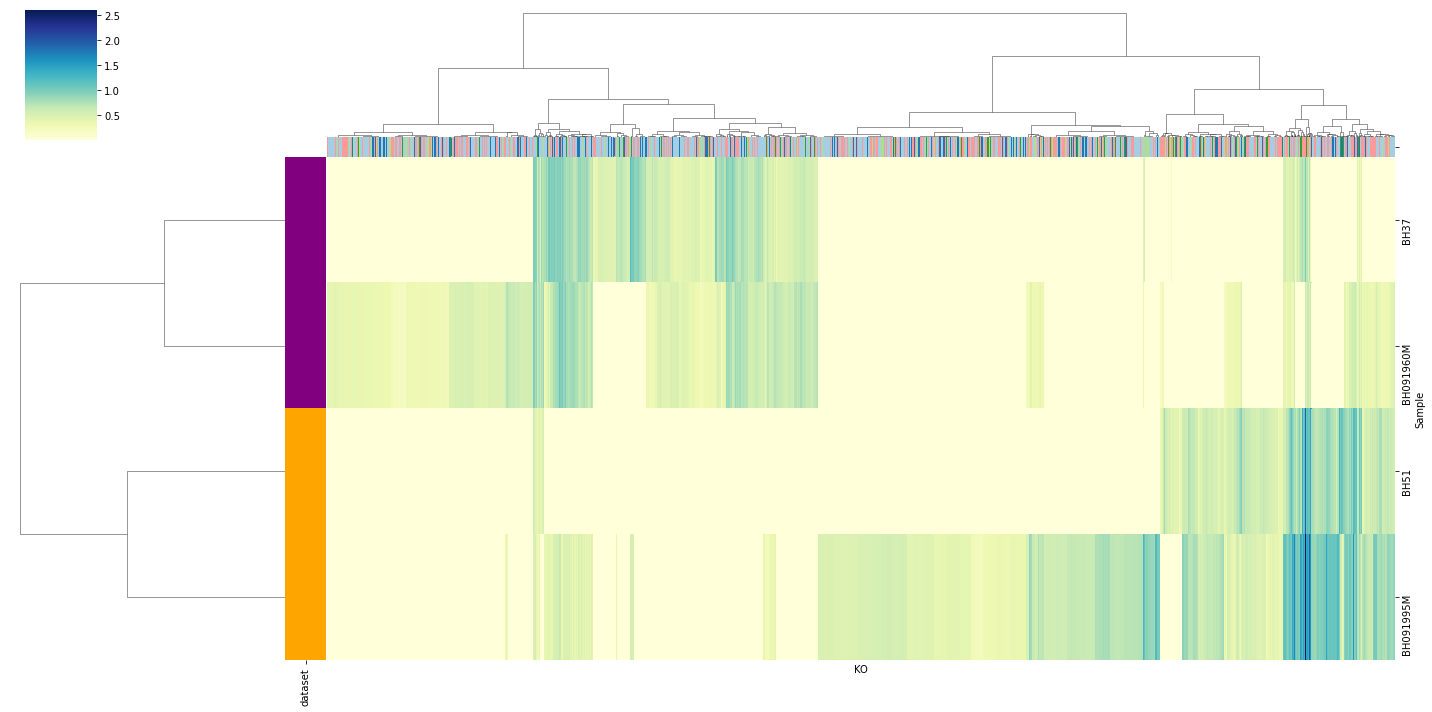

In [40]:
p = sns.clustermap(df6_frthrt, cmap='YlGnBu', figsize=(20,10), xticklabels=False, method='ward',
                   metric='euclidean', row_colors = sample_colors, col_colors=column_colors)

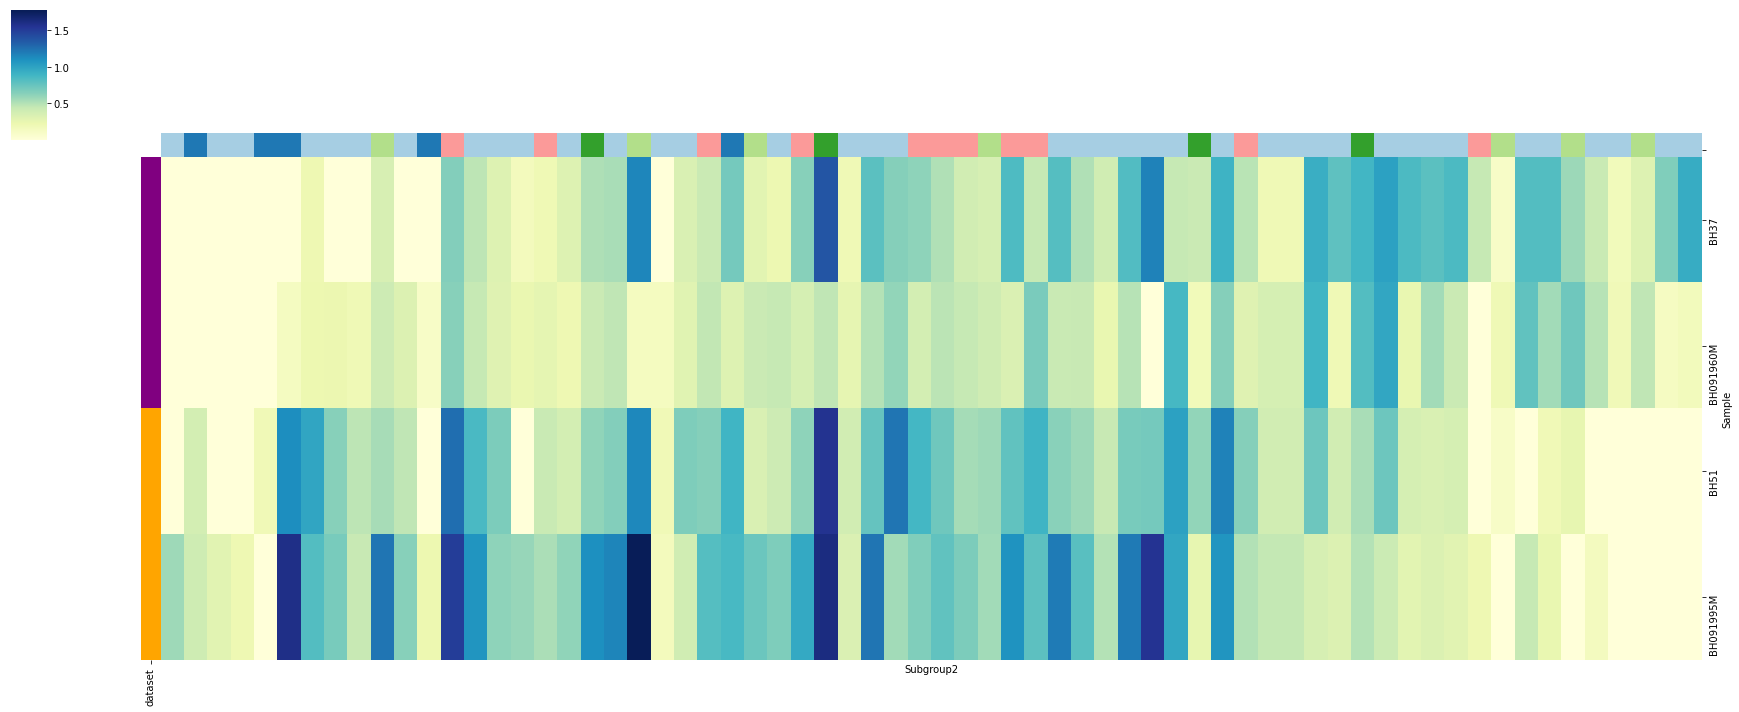

In [42]:
p = sns.clustermap(df6_sqrt, cmap='YlGnBu', method='ward', metric='euclidean', xticklabels=False, row_cluster=False,
                   col_cluster=False, yticklabels=True, row_colors = sample_colors, col_colors = column_colors)
hm = p.ax_heatmap.get_position()
col = p.ax_col_dendrogram.get_position()
#p.ax_heatmap.invert_yaxis()
#plt.setp(p.ax_heatmap.yaxis.get_majorticklabels(), fontsize=18)
#plt.setp(p.ax_heatmap.xaxis.get_majorticklabels(), fontsize=22)
#plt.setp(p.ax_heatmap.yaxis.invert())
p.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*3, hm.height])
p.ax_col_colors.set_position([col.x0, col.y0-0.04, col.width*3, col.height*0.25])
#row = p.ax_row_dendrogram.get_position()
#p.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*3, col.height*0.5])
#p.ax_row_dendrogram.set_position([row.x0+0.07, row.y0, row.width*0.75, row.height])
#p.ax_col_dendrogram.set_visible(False)

In [43]:
p.savefig("FigS6B_new.png")

## Set palette for color bar

In [34]:
my_palette = dict(zip(concat.dataset.unique(), ["purple","orange"]))
row_colors = concat.dataset.map(my_palette)
sampz = concat.Sample

In [35]:
sample_colors = sampz.to_frame().join(row_colors)
sample_colors = sample_colors.drop_duplicates(subset=['Sample'])
sample_colors = sample_colors.set_index('Sample')
sample_colors.head()

,dataset
Sample,
BH091960M,purple
BH37,purple
BH091995M,orange
BH51,orange


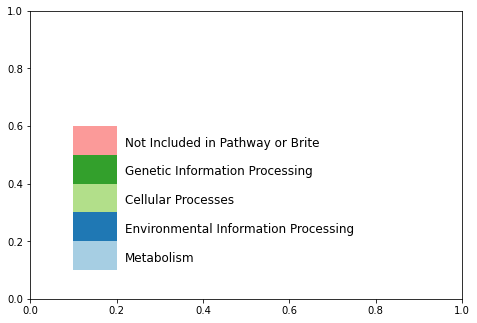

In [64]:
x, y = (0.1, 0)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for func in df6_func['Group'].unique():
    y = y + 0.1
    color = lut[func]
    #cat = lut3[ko]
    square = plt.Rectangle((x, y), 0.1, 0.1, fc=color)
    plt.gca().add_patch(square)
    plt.text(x + 0.12, y + 0.03, func, fontsize=12)

In [79]:
fig.savefig('FigS6B_legend.png')